## Correlation: &thinsp; DOC and high clouds

HCF - High Cloud Fraction <br>
<br>

In [2]:
import xarray as xr
import numpy as np
from scipy import stats

from os.path import expanduser
home = expanduser("~")

import matplotlib.pyplot as plt

import cartopy
import warnings
from shapely.errors import ShapelyDeprecationWarning
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)

In [3]:
from metrics.get_variables.myFuncs import *

ModuleNotFoundError: No module named 'plotFuncs'

In [ ]:
plt.rcParams['figure.figsize'] = [10, 7.5]

### one dataset

In [ ]:
variable = 'cloudFraction'

org_options = [
    'rome',
    # 'o_number'
    ]

models = [
    # 'IPSL-CM5A-MR', # 1
    'GFDL-CM3',     # 2
    # 'GISS-E2-H',    # 3
    # 'bcc-csm1-1',   # 4
    # 'CNRM-CM5',     # 5
    # 'CCSM4',        # 6
    # 'HadGEM2-AO',   # 7
    # 'BNU-ESM',      # 8
    # 'EC-EARTH',     # 9
    # 'FGOALS-g2',    # 10
    # 'MPI-ESM-MR',   # 11
    # 'CMCC-CM',      # 12
    # 'inmcm4',       # 13
    # 'NorESM1-M',    # 14
    # 'CanESM2',      # 15
    # 'MIROC5',       # 16
    # 'HadGEM2-CC',   # 17
    # 'MRI-CGCM3',    # 18
    # 'CESM1-BGC'     # 19
    ]

observations = [
    ]

datasets = models + observations

resolutions = [
    # 'original',
    'regridded'
    ]

experiments = [
    'historical',
    # 'rcp85'
    ]


print('variable:{}, dataset:{}, experiment:{}, resolution:{}'.format(variable, datasets[0], experiments[0], resolutions[0]))
ds = get_dsvariable(variable, datasets[0], experiments[0], resolution=resolutions[0])
ds

variable:cloudFraction, dataset:GFDL-CM3, experiment:historical, resolution:regridded


<xarray.Dataset>
Dimensions:  (time: 360, lat: 22, lon: 128)
Coordinates:
  * time     (time) object 1970-01-16 12:00:00 ... 1999-12-16 12:00:00
  * lat      (lat) float64 -29.3 -26.51 -23.72 -20.93 ... 20.93 23.72 26.51 29.3
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
Data variables:
    cl_low   (time, lat, lon) float64 ...
    cl_high  (time, lat, lon) float64 ...
Attributes:
    description:  Cloud fraction calculated as maximum between pressure level...

In [ ]:
data = ds['cl_high']
data

<xarray.DataArray 'cl_high' (time: 360, lat: 22, lon: 128)>
[1013760 values with dtype=float64]
Coordinates:
  * time     (time) object 1970-01-16 12:00:00 ... 1999-12-16 12:00:00
  * lat      (lat) float64 -29.3 -26.51 -23.72 -20.93 ... 20.93 23.72 26.51 29.3
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2

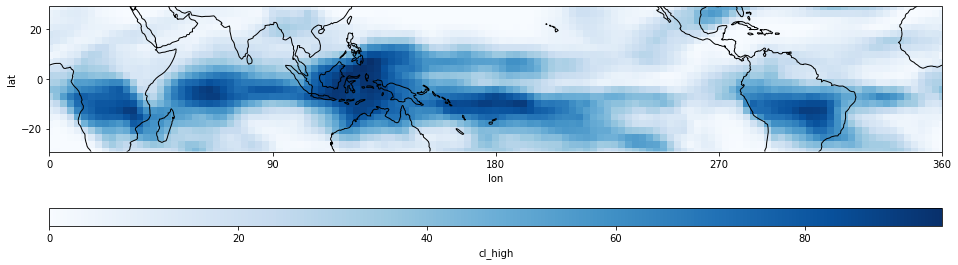

In [ ]:
plot_scene(data.isel(time=0), 'Blues')

In [ ]:
org = get_metric(org_options[0], datasets[0], experiments[0], resolution=resolutions[0])['rome']
org

<xarray.DataArray 'rome' (time: 10950)>
array([ 683534.434225,  880457.953047,  817436.978227, ..., 1267915.787371,
        827632.541006,  978485.728019])
Coordinates:
  * time     (time) object 1970-01-01 12:00:00 ... 1999-12-31 12:00:00
Attributes:
    units:    km^2

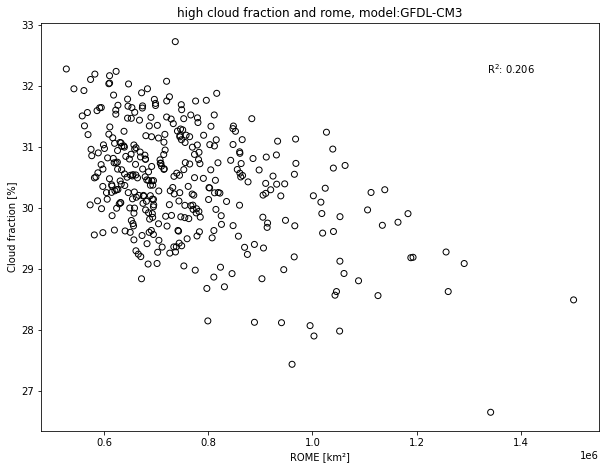

In [ ]:
aWeights = np.cos(np.deg2rad(data.lat))

x = get_metric(org_options[0], datasets[0], experiments[0], resolution=resolutions[0])['rome'].resample(time='M').mean(dim='time')
y = get_dsvariable(variable, datasets[0], experiments[0], resolution=resolutions[0])['cl_high'].weighted(aWeights).mean(dim=('lat', 'lon'))


fig = plt.figure()
ax= fig.add_subplot()
plot_scatter(x, y, ax)
plt.title('high cloud fraction and rome, model:{}'.format(datasets[0]))
plt.xlabel('ROME [{}]'.format('km\u00b2'))
plt.ylabel('Cloud fraction [{}]'.format('%'))
plt.show()


### anomalies from monthly mean

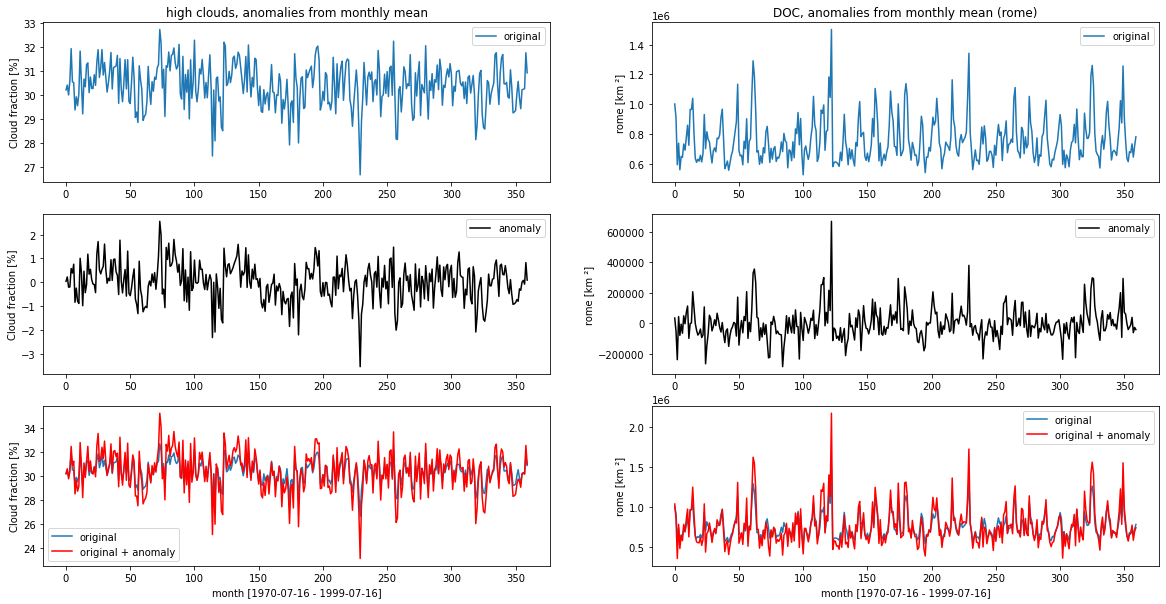

In [ ]:
aWeights = np.cos(np.deg2rad(data.lat))
f = data.weighted(aWeights).mean(dim=('lat','lon'))
climatology = f.groupby('time.month').mean('time')
data_anomalies_month = f.groupby('time.month') - climatology 

fig, axs = plt.subplots(3,2,figsize=(20,10))

xlabel = '{} [{} - {}]'.format('month', str(data.isel(time=6).coords['time'].values)[:10], str(data.isel(time=-6).coords['time'].values)[:10])
ylabel = '{} [{}]'.format('Cloud fraction', '%')

plt.sca(axs[0, 0])
plt.plot(f, label='original')
plt.ylabel(ylabel)
plt.title('high clouds, anomalies from monthly mean')
plt.legend()

plt.sca(axs[1,0])
plt.plot(data_anomalies_month, 'k', label='anomaly')
plt.ylabel(ylabel)
plt.legend()

plt.sca(axs[2,0])
plt.plot(f, label='original')
plt.plot(f+data_anomalies_month,color='r', label='original + anomaly')
plt.ylabel(ylabel)
plt.xlabel(xlabel)
plt.legend()

f = org.resample(time='M').mean(dim='time', keep_attrs=True)
climatology = f.groupby('time.month').mean('time')
org_anomalies_month = f.groupby('time.month') - climatology 

xlabel = '{} [{} - {}]'.format('month', str(data.isel(time=6).coords['time'].values)[:10], str(data.isel(time=-6).coords['time'].values)[:10])
ylabel = '{} [{}]'.format('rome', 'km \u00b2')

plt.sca(axs[0, 1])
plt.plot(f, label='original')
plt.ylabel(ylabel)
plt.title('DOC, anomalies from monthly mean ({})'.format(org_options[0]))
plt.legend()

plt.sca(axs[1,1])
plt.plot(org_anomalies_month, 'k', label='anomaly')
plt.ylabel(ylabel)
plt.legend()

plt.sca(axs[2,1])
plt.plot(f, label='original')
plt.plot(f+org_anomalies_month,color='r', label='original + anomaly')
plt.ylabel(ylabel)
plt.xlabel(xlabel)
plt.legend()

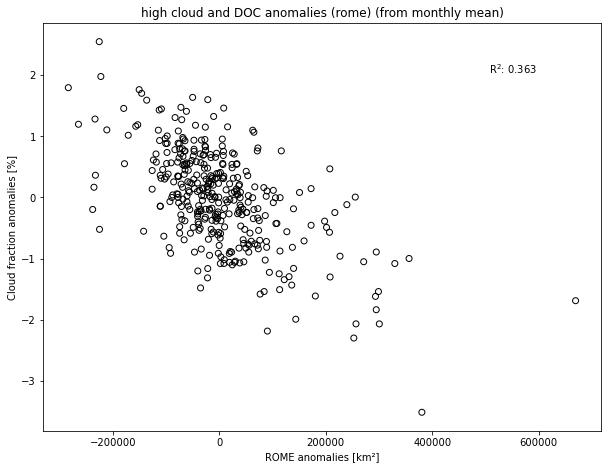

In [ ]:
fig = plt.figure()
ax= fig.add_subplot()

plot_scatter(org_anomalies_month, data_anomalies_month, ax)
plt.title('high cloud and DOC anomalies ({}) (from monthly mean)'.format(org_options[0]))
plt.xlabel('ROME anomalies [{}]'.format('km\u00b2'))
plt.ylabel('Cloud fraction anomalies [{}]'.format('%'))
plt.show()

### comparing datasets

In [ ]:
variable = 'cloudFraction'

org_options = [
    'rome',
    # 'o_number'
    ]

models = [
    'IPSL-CM5A-MR', # 1
    'GFDL-CM3',     # 2
    # 'GISS-E2-H',    # 3 no data
    'bcc-csm1-1',   # 4
    # 'CNRM-CM5',     # 5
    # 'CCSM4',        # 6
    # 'HadGEM2-AO',   # 7
    # 'BNU-ESM',      # 8
    # 'EC-EARTH',     # 9 
    'FGOALS-g2',    # 10
    'MPI-ESM-MR',   # 11
    # 'CMCC-CM',      # 12
    'inmcm4',       # 13
    'NorESM1-M',    # 14
    'CanESM2',      # 15
    'MIROC5',       # 16
    # 'HadGEM2-CC',   # 17
    'MRI-CGCM3',    # 18
    # 'CESM1-BGC'     # 19
    ]

observations = [
    ]

datasets = models + observations

resolutions = [
    # 'original',
    'regridded'
    ]

experiments = [
    'historical',
    # 'rcp85'
    ]

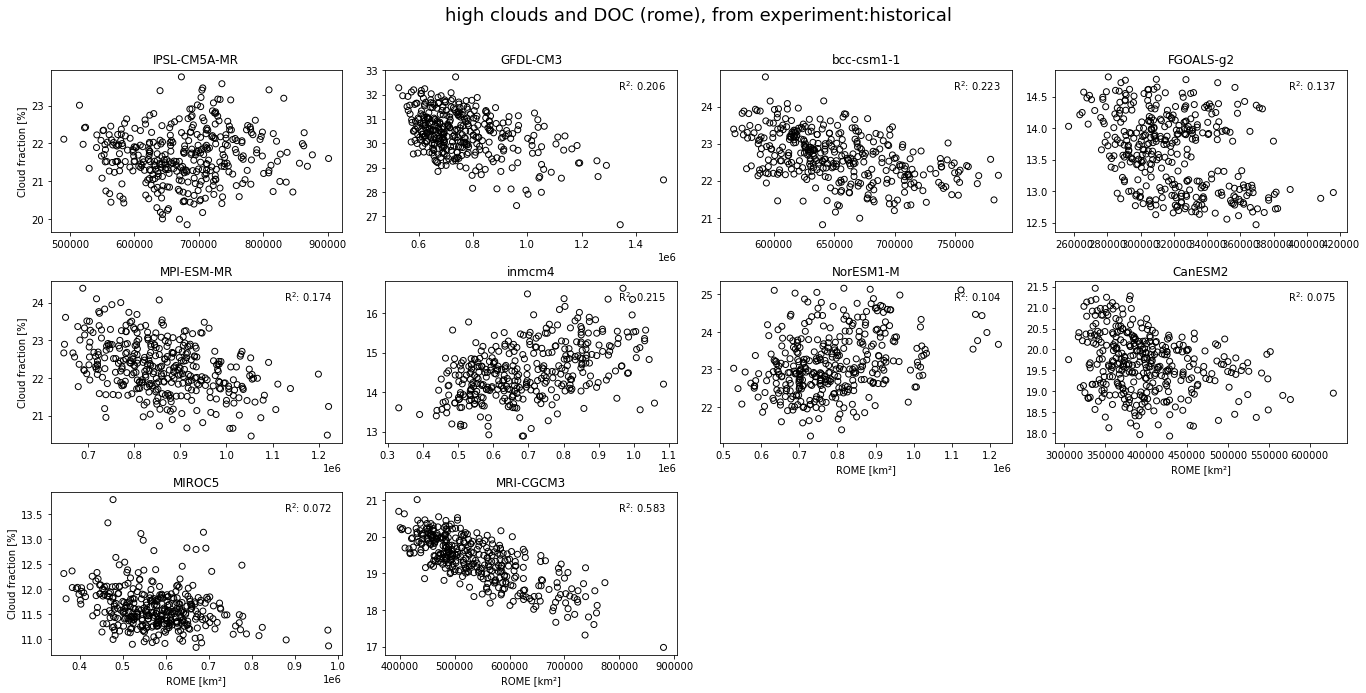

In [ ]:
quantile_low = 0
quantile_high = 1

absolute_xlimits = False
if absolute_xlimits:
    xmin, xmax = [], []
    for dataset in datasets:

        org = get_metric(org_options[0], dataset, experiments[0], resolution=resolutions[0])['rome']
        x = org.resample(time='M').mean(dim='time', keep_attrs=True)

        xmin = np.append(xmin, np.quantile(x, quantile_low))
        xmax = np.append(xmax, np.quantile(x, quantile_high))

    xmin = np.min(xmin)
    xmax = np.max(xmax)
else:
    xmin, xmax = None, None 


absolute_ylimits = False
if absolute_ylimits:
    ymin, ymax = [], []
    for dataset in datasets:

        data = get_dsvariable(variable, dataset, experiments[0], resolution=resolutions[0])['cl_high'] 
        aWeights = np.cos(np.deg2rad(data.lat))
        y = data.weighted(aWeights).mean(dim=('lat','lon'))

        ymin = np.append(ymin, np.quantile(y, quantile_low))
        ymax = np.append(ymax, np.quantile(y, quantile_high))

    ymin = np.min(ymin)
    ymax = np.max(ymax)

else:
    ymin, ymax = None, None 


fig= plt.figure(figsize=(22.5,17.5))
title = 'high clouds and DOC ({}), from experiment:{}'.format(org_options[0], experiments[0])

fig.suptitle(title, fontsize=18, y=0.95)

for i, dataset in enumerate(datasets):
    ax= fig.add_subplot(5,4,i+1)
    title = dataset

    org = get_metric(org_options[0], dataset, experiments[0], resolution=resolutions[0])['rome']
    x = org.resample(time='M').mean(dim='time', keep_attrs=True)

    data = get_dsvariable(variable, dataset, experiments[0], resolution=resolutions[0])['cl_high']
    aWeights = np.cos(np.deg2rad(data.lat))
    y = data.weighted(aWeights).mean(dim=('lat','lon'))

    plot_scatter(x, y , ax)
    plt.title(dataset)
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)

    if (len(datasets)-i)<=4:
        xlabel = 'ROME [{}]'.format('km\u00b2')
        plt.xlabel(xlabel)

    if i== 0 or i==4 or i==8 or i==12 or i==16:
        ylabel = 'Cloud fraction [{}]'.format('%')
        plt.ylabel(ylabel)

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.15, hspace=0.3)

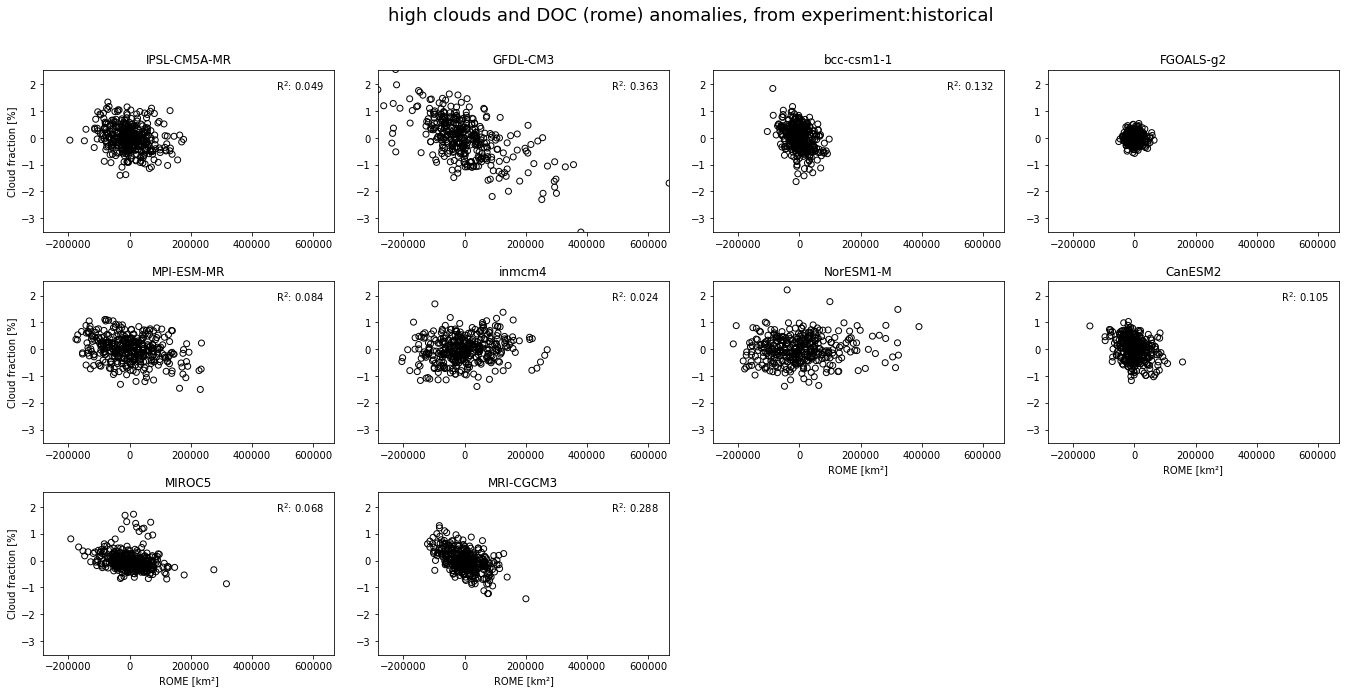

In [ ]:
quantile_low = 0
quantile_high = 1

absolute_xlimits = True
if absolute_xlimits:
    xmin, xmax = [], []
    for dataset in datasets:

        org = get_metric(org_options[0], dataset, experiments[0], resolution=resolutions[0])['rome']
        f = org.resample(time='M').mean(dim='time', keep_attrs=True)
        climatology = f.groupby('time.month').mean('time')
        org_anomalies_month = f.groupby('time.month') - climatology 
        x = org_anomalies_month

        xmin = np.append(xmin, np.quantile(x, quantile_low))
        xmax = np.append(xmax, np.quantile(x, quantile_high))

    xmin = np.min(xmin)
    xmax = np.max(xmax)
else:
    xmin, xmax = None, None 


absolute_ylimits = True
if absolute_ylimits:
    ymin, ymax = [], []
    for dataset in datasets:

        data = get_dsvariable(variable, dataset, experiments[0], resolution=resolutions[0])['cl_high'] 
        aWeights = np.cos(np.deg2rad(data.lat))
        f = data.weighted(aWeights).mean(dim=('lat','lon'))
        climatology = f.groupby('time.month').mean('time')
        data_anomalies_month = f.groupby('time.month') - climatology 
        y = data_anomalies_month

        ymin = np.append(ymin, np.quantile(y, quantile_low))
        ymax = np.append(ymax, np.quantile(y, quantile_high))

    ymin = np.min(ymin)
    ymax = np.max(ymax)

else:
    ymin, ymax = None, None 


fig= plt.figure(figsize=(22.5,17.5))
title = 'high clouds and DOC ({}) anomalies, from experiment:{}'.format(org_options[0], experiments[0])

fig.suptitle(title, fontsize=18, y=0.95)

for i, dataset in enumerate(datasets):
    ax= fig.add_subplot(5,4,i+1)
    title = dataset

    org = get_metric(org_options[0], dataset, experiments[0], resolution=resolutions[0])['rome']
    f = org.resample(time='M').mean(dim='time', keep_attrs=True)
    climatology = f.groupby('time.month').mean('time')
    org_anomalies_month = f.groupby('time.month') - climatology 


    data = get_dsvariable(variable, dataset, experiments[0], resolution=resolutions[0])['cl_high']
    aWeights = np.cos(np.deg2rad(data.lat))
    f = data.weighted(aWeights).mean(dim=('lat','lon'))
    climatology = f.groupby('time.month').mean('time')
    data_anomalies_month = f.groupby('time.month') - climatology 

    plot_scatter(org_anomalies_month, data_anomalies_month , ax)
    plt.title(dataset)
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)

    if (len(datasets)-i)<=4:
        xlabel = 'ROME [{}]'.format('km\u00b2')
        plt.xlabel(xlabel)

    if i== 0 or i==4 or i==8 or i==12 or i==16:
        ylabel = 'Cloud fraction [{}]'.format('%')
        plt.ylabel(ylabel)

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.15, hspace=0.3)

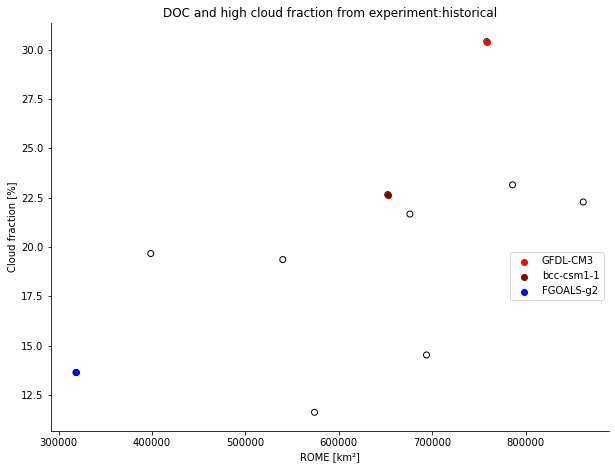

In [ ]:
labels =[
    # 'IPSL-CM5A-MR', # 1
    'GFDL-CM3',     # 2
    # 'GISS-E2-H',    # 3
    'bcc-csm1-1',   # 4
    # 'CNRM-CM5',     # 5
    # 'CCSM4',        # 6
    # 'HadGEM2-AO',   # 7
    # 'BNU-ESM',      # 8
    'FGOALS-g2',    # 10
    # 'MPI-ESM-MR',   # 11
    # 'CMCC-CM',      # 12
    # 'inmcm4',       # 13
    # 'NorESM1-M',    # 14
    # 'CanESM2',      # 15
    # 'MIROC5',       # 16
    # 'HadGEM2-CC',   # 17
    # 'MRI-CGCM3',    # 18
    # 'CESM1-BGC'     # 19
    ]
colors = [
    'r',
    'darkred',
    'b', 
    'g'
    ]


x= []
y= []
for dataset in datasets:

    x_data = get_metric(org_options[0], dataset, experiments[0], resolution=resolutions[0])['rome'].mean(dim=('time'))
    x = np.append(x, x_data)

    data = get_dsvariable(variable, dataset, experiments[0], resolution=resolutions[0])['cl_high']
    aWeights = np.cos(np.deg2rad(data.lat))  
    y_data = data.weighted(aWeights).mean(dim=('time', 'lat','lon'))
    y = np.append(y, y_data)


fig, ax = plt.subplots()
title = 'DOC and {} from experiment:{}'.format('high cloud fraction', experiments[0])
xlabel = 'ROME [{}]'.format('km\u00b2')
ylabel = 'Cloud fraction [{}]'.format('%')

plot_scatter(x,y,ax)

if labels:
    for i, label in enumerate(labels):
        dataset_idx= datasets.index(label)
        plt.scatter(x[dataset_idx],y[dataset_idx],c=colors[i], label=label)
        plt.legend(bbox_to_anchor=(0.6,0.05,0.4,0.4))

sns.despine(top=True, right=True, left=False)
plt.title(title)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.show()

### changes with warming

In [ ]:
labels =[
    # 'IPSL-CM5A-MR', # 1
    'GFDL-CM3',     # 2
    # 'GISS-E2-H',    # 3
    'bcc-csm1-1',   # 4
    # 'CNRM-CM5',     # 5
    # 'CCSM4',        # 6
    # 'HadGEM2-AO',   # 7
    # 'BNU-ESM',      # 8
    'FGOALS-g2',    # 10
    # 'MPI-ESM-MR',   # 11
    # 'CMCC-CM',      # 12
    # 'inmcm4',       # 13
    # 'NorESM1-M',    # 14
    # 'CanESM2',      # 15
    # 'MIROC5',       # 16
    # 'HadGEM2-CC',   # 17
    # 'MRI-CGCM3',    # 18
    # 'CESM1-BGC'     # 19
    ]
colors = [
    'r',
    'darkred',
    'b', 
    'g'
    ]


x= []
y= []
for dataset in datasets:

    x_historical = get_metric(org_options[0], dataset, experiment = 'historical', resolution=resolutions[0])['rome'].mean(dim=('time'))
    x_rcp = get_metric(org_options[0], dataset, experiment = 'rcp85', resolution=resolutions[0])['rome'].mean(dim=('time'))
    
    x_diff = x_rcp - x_historical
    x = np.append(x, x_diff)


    
    data = get_dsvariable(variable, dataset, experiment='historical', resolution=resolutions[0])['cl_high']
    aWeights = np.cos(np.deg2rad(data.lat))  
    y_historical = data.weighted(aWeights).mean(dim=('time', 'lat','lon'))
    
    data = get_dsvariable(variable, dataset, experiment='rcp85', resolution=resolutions[0])['cl_high']
    aWeights = np.cos(np.deg2rad(data.lat))  
    y_rcp = data.weighted(aWeights).mean(dim=('time', 'lat','lon'))

    y_diff = y_rcp - y_historical
    y = np.append(y, y_diff)


    # tas_historical = get_dsvariable(variable='tas', dataset=dataset, experiment='historical')['tas'].weighted(aWeights).mean(dim=('time','lat','lon'))
    # tas_rcp85 = get_dsvariable(variable='tas', dataset=dataset, experiment='rcp85')['tas'].weighted(aWeights).mean(dim=('time','lat','lon'))

    # datadiff = data_rcp - data_historical
    # datadiff = (datadiff/data_historical)*100

    # tasdiff = tas_rcp85 - tas_historical
    # datadiff = datadiff/tasdiff


fig, ax = plt.subplots()
title = 'Absolute differeence in DOC and {}'.format('high cloud fraction')
xlabel = 'ROME [{}]'.format('km\u00b2')
ylabel = 'Cloud fraction [{}]'.format('%')

plot_scatter(x,y,ax)

if labels:
    for i, label in enumerate(labels):
        dataset_idx= datasets.index(label)
        plt.scatter(x[dataset_idx],y[dataset_idx],c=colors[i], label=label)
        plt.legend(bbox_to_anchor=(0.75,0.2))

sns.despine(top=True, right=True, left=False)
plt.axvline(0, color= 'k',  linestyle="--")
plt.axhline(0, color= 'k',  linestyle="--")
plt.title(title)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.show()

NameError: name 'datasets' is not defined